In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [218]:
adhd = pd.read_csv('../../data/processed/adhd_processed.csv', index_col=0)
bipolar = pd.read_csv('../../data/processed/bipolarreddit_processed.csv', index_col=0)
depression = pd.read_csv('../../data/processed/depression_processed.csv', index_col=0)
eda_anonymous = pd.read_csv('../../data/processed/EDAnonymous_processed.csv', index_col=0)
suicide = pd.read_csv('../../data/processed/suicidewatch_processed.csv', index_col=0)
lonely = pd.read_csv('../../data/processed/lonely_processed.csv', index_col=0)
frames = [adhd, bipolar, depression, eda_anonymous, suicide, lonely]

result = pd.concat(frames)

In [219]:
result.head()


,subreddit,author,date,post,substance_use_total,period
0,adhd,S-Kay21,2019/01/18,How much further ahead could I have been by no...,3,pre
1,adhd,lismox42,2019/01/18,ADHD &amp; Bipolar Anyone else have Bipolar Di...,0,pre
2,adhd,reddit_noob_1234,2019/01/18,My relationship is falling apart and I don’t k...,0,pre
3,adhd,JITTERdUdE,2019/01/18,To those struggling to write papers- drink cof...,2,pre
4,adhd,buddingaddiction,2019/01/18,Meds didn't cure chronic laziness But I can fo...,1,pre


In [220]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166471 entries, 0 to 11544
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   subreddit            166471 non-null  object
 1   author               166471 non-null  object
 2   date                 166471 non-null  object
 3   post                 166471 non-null  object
 4   substance_use_total  166471 non-null  int64 
 5   period               166471 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.9+ MB


In [225]:
result = result[result['substance_use_total'] < 10]

result['period'] = result['period'].replace({ 'post':'During','pre':'Before'} )
result['subreddit'] = result['subreddit'].replace({
    'adhd': 'r/adhd',
    'EDAnonymous': 'r/EDAnonymous',
    'bipolarreddit': 'r/bipolarreddit',
    'depression': 'r/depression',
    'lonely': 'r/lonely',
    'suicidewatch': 'r/suicidewatch',
})

mean_results = result.groupby(['subreddit', 'period']).mean('substance_use_total')
mean_results = mean_results.reset_index()

print(mean_results)
print(mean_results.columns.get_level_values(0))

          subreddit  period  substance_use_total
0     r/EDAnonymous  Before             0.297826
1     r/EDAnonymous  During             0.261059
2            r/adhd  Before             0.538905
3            r/adhd  During             0.492129
4   r/bipolarreddit  Before             0.463720
5   r/bipolarreddit  During             0.502560
6      r/depression  Before             0.437949
7      r/depression  During             0.426570
8          r/lonely  Before             0.273070
9          r/lonely  During             0.303041
10   r/suicidewatch  Before             0.396420
11   r/suicidewatch  During             0.377916
Index(['subreddit', 'period', 'substance_use_total'], dtype='object')


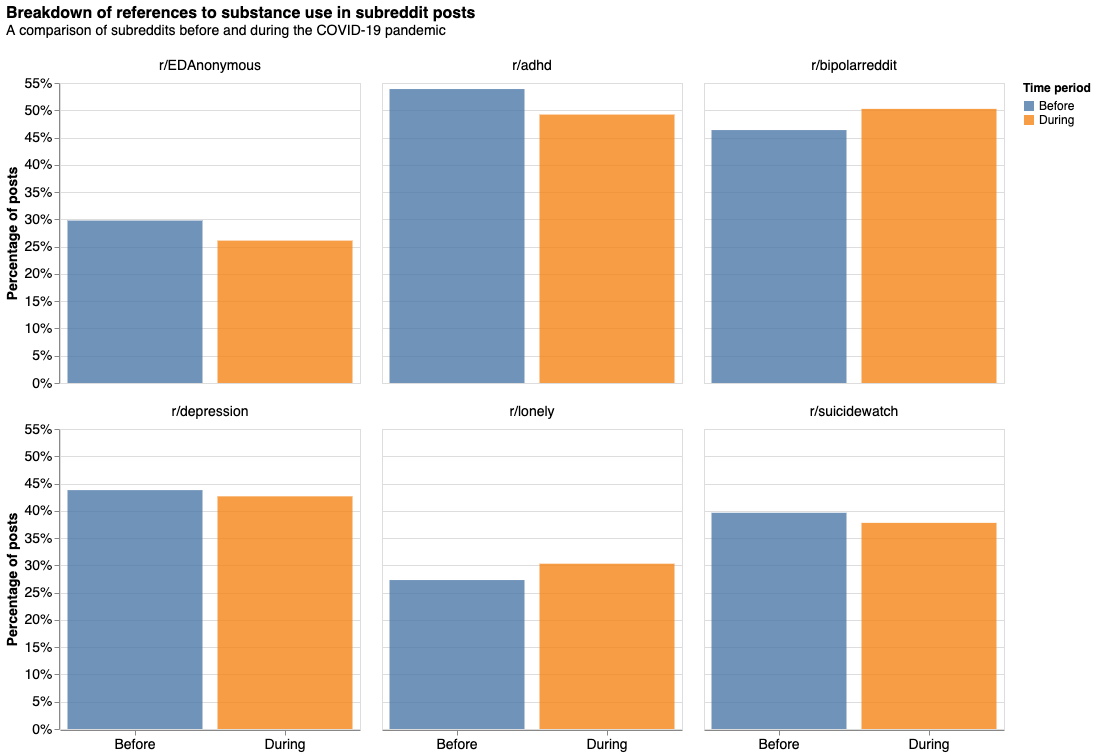

In [238]:
alt.Chart(mean_results).mark_bar(opacity=0.8).encode(
    x=alt.X('period',
            sort=['Before', 'During'],
            title='',
               axis=alt.Axis(labelAngle=0) 
           ),
    y=alt.Y('substance_use_total', 
            title="Percentage of posts", 
            axis=alt.Axis(format='%')),
    color=alt.Color('period', legend=alt.Legend(title='Time period', titleFontSize=12, labelFontSize=12)),
).properties(
    width=300,
    height=300,
).facet(
    title= alt.TitleParams(
        offset=20,
        fontSize=16,
        subtitleFontSize=14,
        text='Breakdown of references to substance use in subreddit posts',
        subtitle="A comparison of subreddits before and during the COVID-19 pandemic"),
    facet=alt.Facet('subreddit', header=alt.Header(labelFontSize=14, title="")),
    columns=3
).configure_axis(
    labelFontSize=14,
    titleFontSize=14,
)

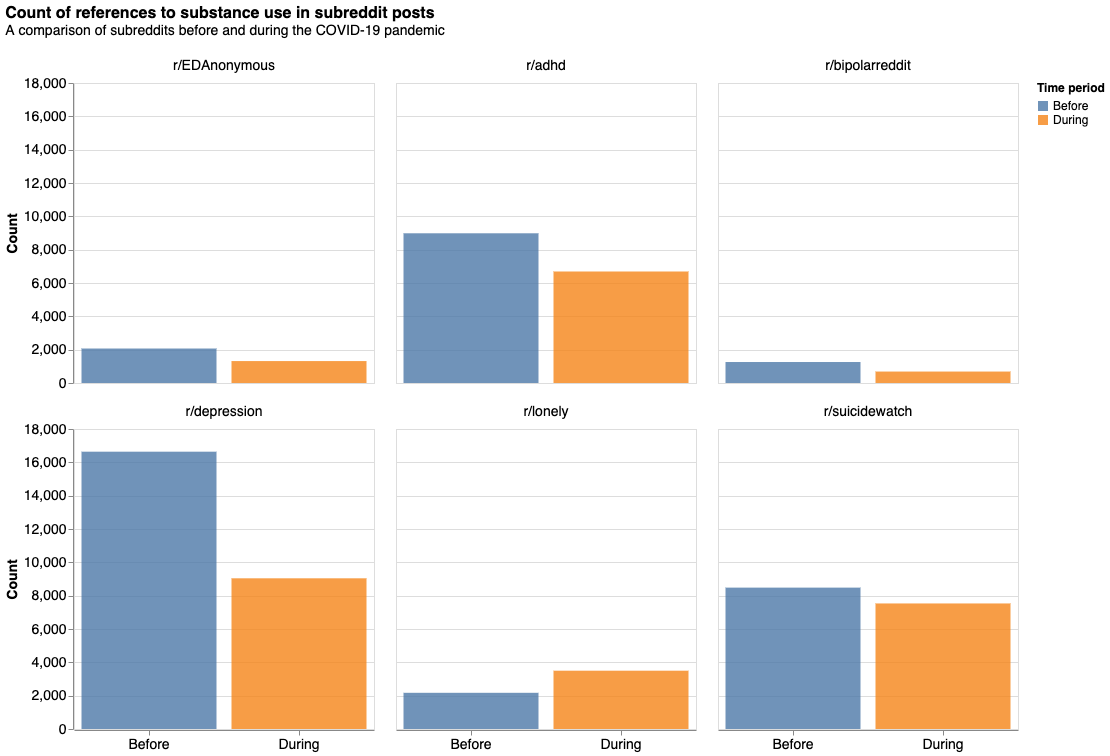

In [246]:
count_results = result.groupby(['subreddit', 'period']).sum('substance_use_total')
count_results = count_results.reset_index()

alt.Chart(count_results).mark_bar(opacity=0.8).encode(
    x=alt.X('period',
            sort=['Before', 'During'],
            title='',
               axis=alt.Axis(labelAngle=0) 
           ),
    y=alt.Y('substance_use_total', 
            title="Count"), 
            # axis=alt.Axis(format='%')),x
            color=alt.Color('period', legend=alt.Legend(title='Time period', titleFontSize=12, labelFontSize=12)),
).properties(
    width=300,
    height=300,
).facet(
    title= alt.TitleParams(
        offset=20,
        fontSize=16,
        subtitleFontSize=14,
        text='Count of references to substance use in subreddit posts',
        subtitle="A comparison of subreddits before and during the COVID-19 pandemic"),
    facet=alt.Facet('subreddit', header=alt.Header(labelFontSize=14, title="")),
    columns=3
).configure_axis(
    labelFontSize=14,
    titleFontSize=14,
)

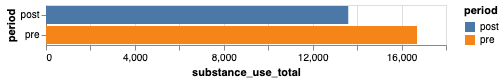

In [228]:
plot = alt.Chart(adhd).mark_bar().encode(
    x='count(substance_use_total)',
    y='period',
    color='period'
)

err_bars = alt.Chart(adhd).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='substance_use_total',
    y='period')

plot + err_bars

In [19]:

adhd.groupby('period').sum('substance_use_total')

,Unnamed: 0,substance_use_total
period,,
post,92500401,6797
pre,139369860,9311


In [20]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(adhd_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(adhd_post.author.unique())}")

NameError: name 'adhd_pre' is not defined

We have a roughly balanced data set of users posting before and after the pandemic.   
We see that the mean of `substance_use_total` was greater before the pandemic rather than after.